# Classification of three types of wines

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

https://archive.ics.uci.edu/ml/datasets/Wine

In [1]:
# Library imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pathlib

## Load the dataset

In [2]:
# get the dataset

dataset_path = "D:\\ML-Datasets\\UCI-Datasets\\wine.data"

column_names = ['Class', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
               'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD Dilution', 'Proline']

raw_dataset = pd.read_csv(dataset_path, names=column_names, sep=",")

# Check the load
raw_dataset.head()

,Class,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [52]:
# Check for missing values
sum(raw_dataset.isna().sum())

0

In [53]:
# Check the data structure
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity of ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD Dilution           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [54]:
# We will convert the target variable to categorical
raw_dataset['Class'] = pd.Categorical(raw_dataset['Class'])

### Data Visualization

2    71
1    59
3    48
Name: Class, dtype: int64


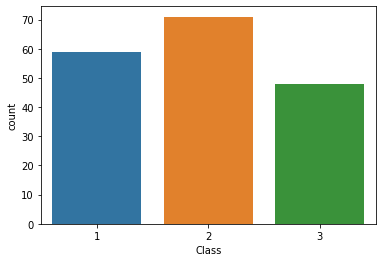

In [55]:
# Visualize the target variable
sns.countplot(raw_dataset['Class'])
print(raw_dataset['Class'].value_counts())

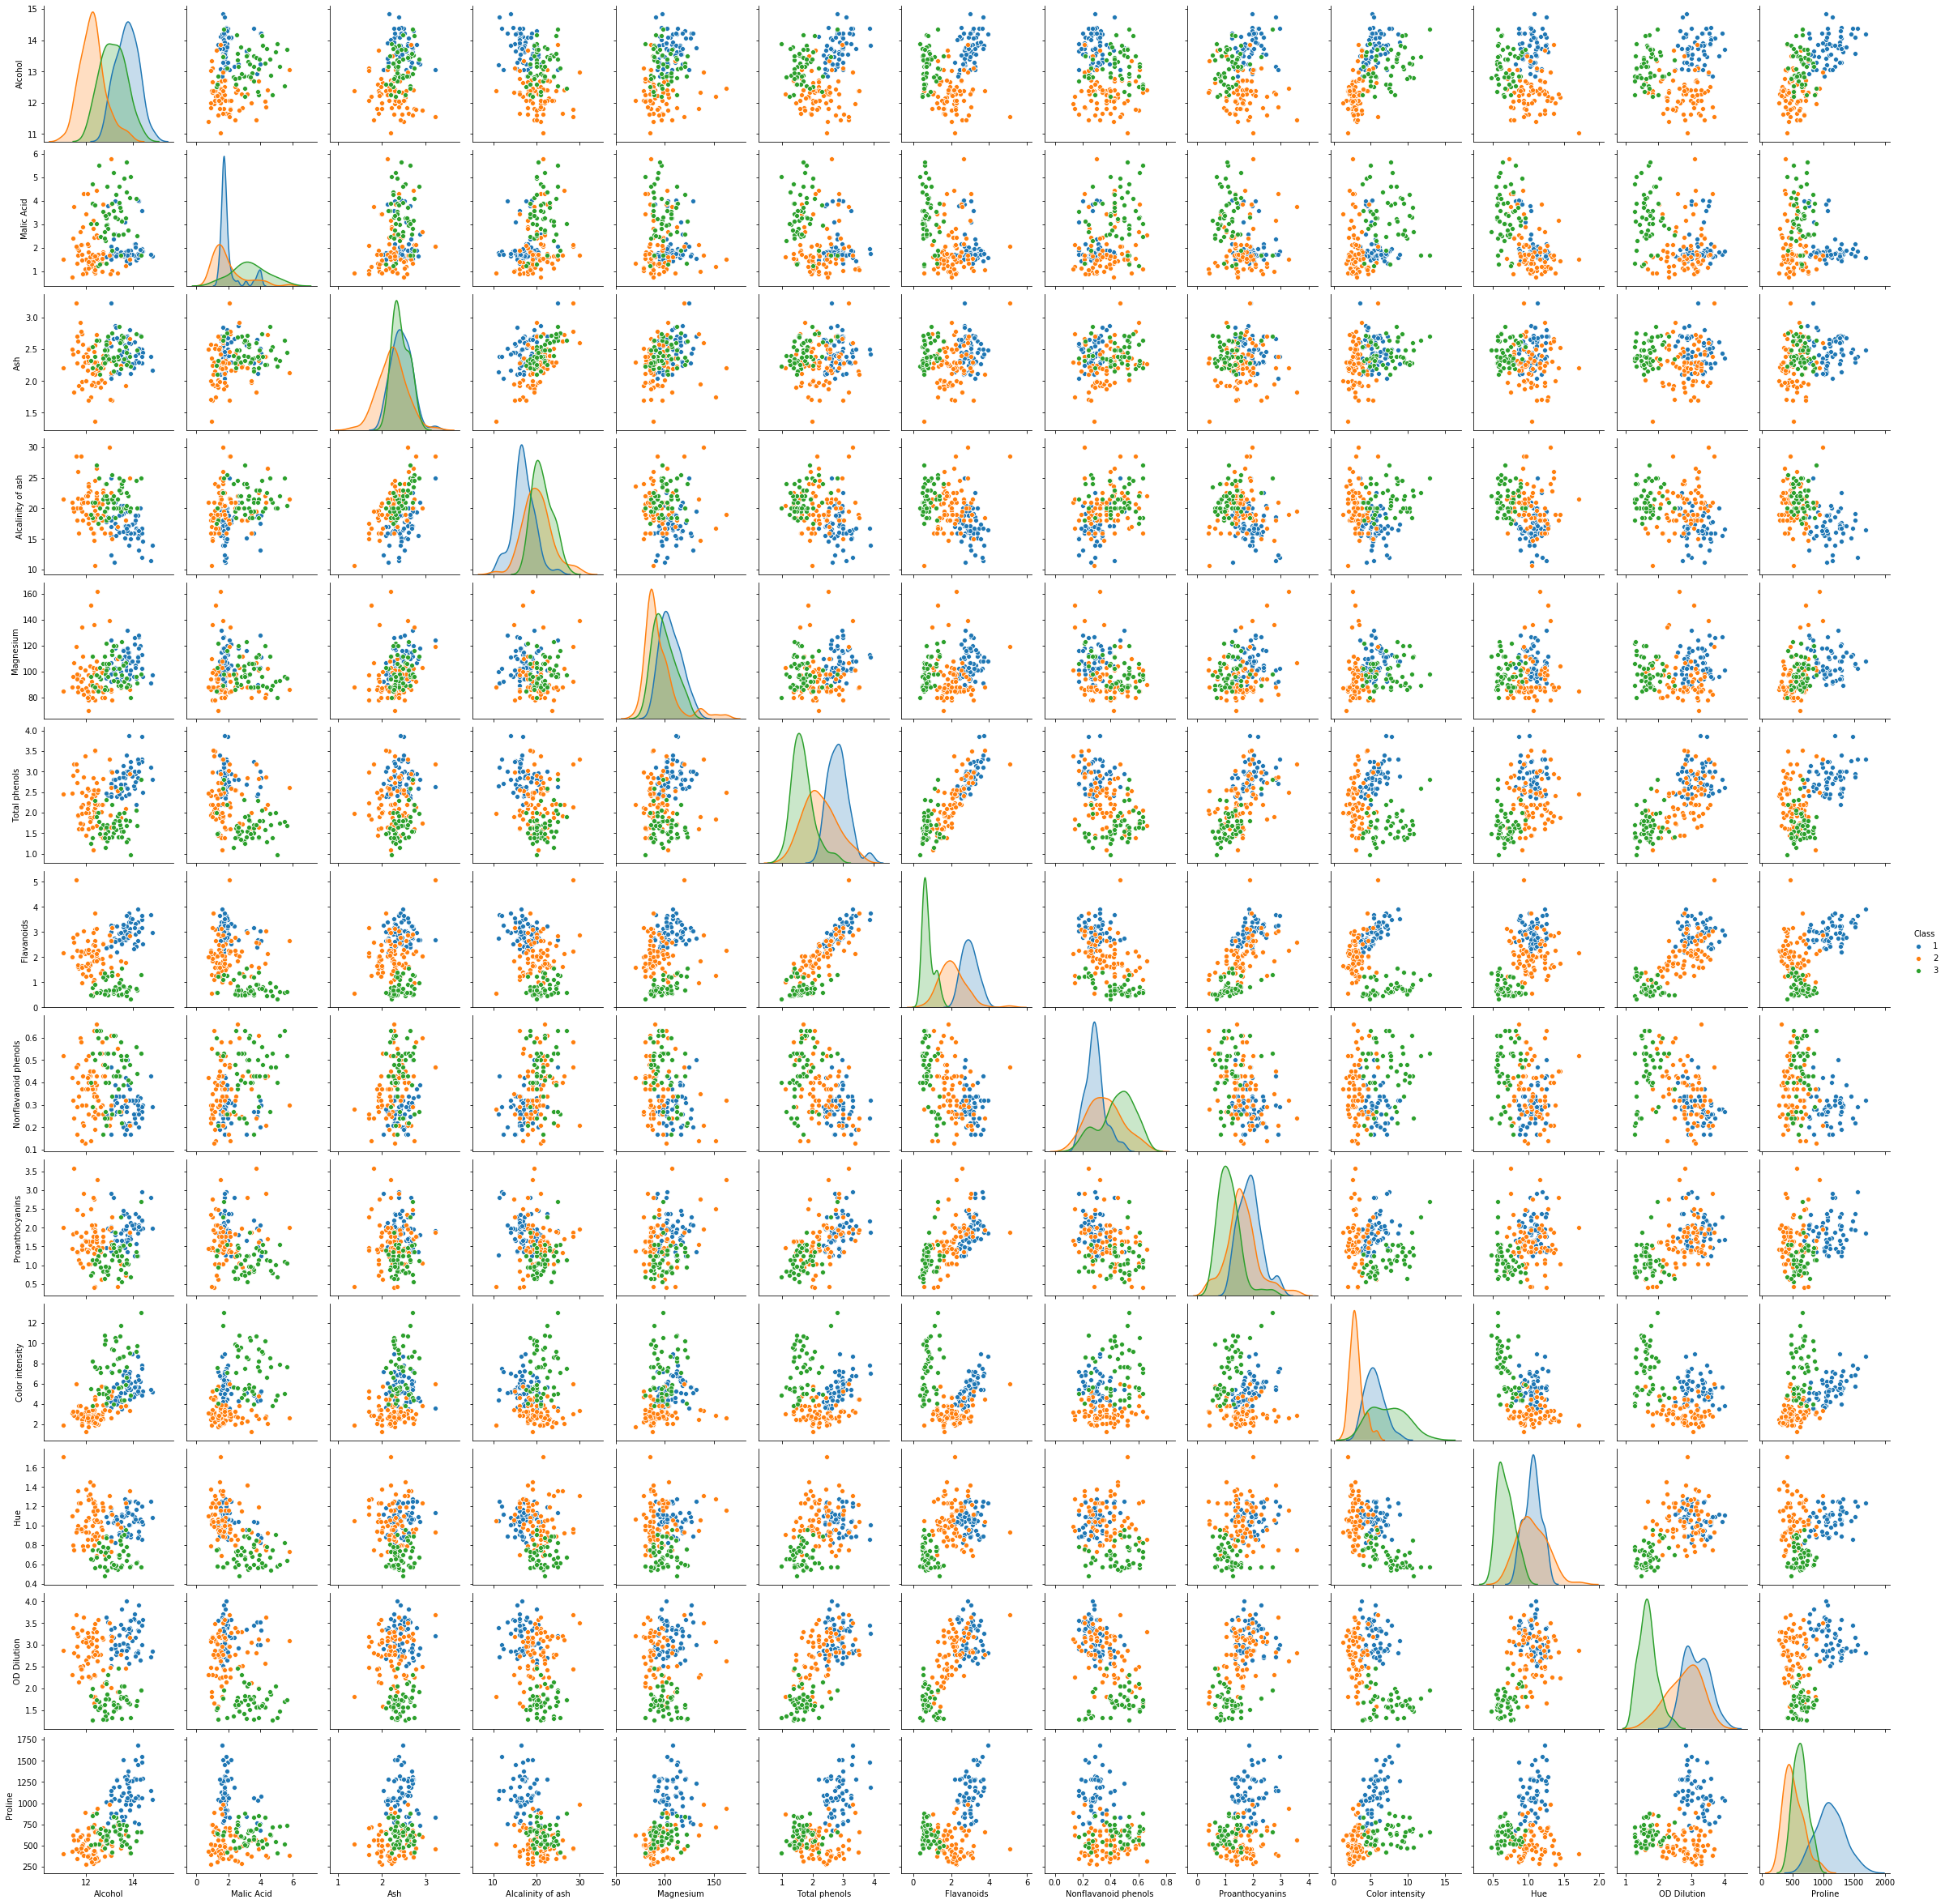

In [56]:
# Visualize the pair plot by the target variable across the dataset
sns.pairplot(raw_dataset, hue='Class')

## Linear Discriminant Analysis (LDA)

In [57]:
# Create a separate dataset for this analysis

dataset = raw_dataset.copy()

In [58]:
# Shuffle the dataset, since the rows are arranged by order of classes
from sklearn.utils import shuffle

dataset = shuffle(dataset)
# We will also reset the index
dataset.reset_index(inplace=True, drop=True)
dataset.head()

,Class,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD Dilution,Proline
0,2,11.87,4.31,2.39,21.0,82,2.86,3.03,0.21,2.91,2.80,0.75,3.64,380
1,3,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530
2,2,11.61,1.35,2.70,20.0,94,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680
3,1,14.19,1.59,2.48,16.5,108,3.30,3.93,0.32,1.86,8.70,1.23,2.82,1680
4,2,13.05,3.86,2.32,22.5,85,1.65,1.59,0.61,1.62,4.80,0.84,2.01,515


In [59]:
# Train, test split

features = dataset.drop('Class', axis=1)
target = dataset['Class']

from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            test_size=0.2, random_state=101 )

In [60]:
# We need to perform feature scaling for LDA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features_train = sc.fit_transform(features_train)
features_test = sc.transform(features_test)

In [61]:
# Perform the lDA, train the model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis(n_components=2)
features_train = model.fit_transform(features_train, target_train)
model.explained_variance_ratio_

array([0.67321769, 0.32678231])

In [62]:
# Model evaluations

# predictions
predictions = model.predict(features_test)

from sklearn.metrics import classification_report, confusion_matrix
print(f'Confusion Matrix')
print(confusion_matrix(target_test, predictions))
print("\n")
print(f'Classification Report')
print(classification_report(target_test, predictions))

Confusion Matrix
[[15  0  0]
 [ 0 15  0]
 [ 0  0  6]]


Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## Support Vector Classifiers (SVC)

In [63]:
# Create a separate dataset for this analysis

dataset = raw_dataset.copy()

In [64]:
# Shuffle the dataset, since the rows are arranged by order of classes
from sklearn.utils import shuffle

dataset = shuffle(dataset)
# We will also reset the index
dataset.reset_index(inplace=True, drop=True)
dataset.head()

,Class,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD Dilution,Proline
0,2,13.49,1.66,2.24,24.0,87,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472
1,1,13.05,1.73,2.04,12.4,92,2.72,3.27,0.17,2.91,7.20,1.12,2.91,1150
2,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
3,2,12.00,1.51,2.42,22.0,86,1.45,1.25,0.50,1.63,3.60,1.05,2.65,450
4,1,14.75,1.73,2.39,11.4,91,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150


In [65]:
# Train, test split

features = dataset.drop('Class', axis=1)
target = dataset['Class']

from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            test_size=0.2, random_state=101 )

In [66]:
# We need to perform feature scaling for SVM
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features_train = sc.fit_transform(features_train)
features_test = sc.transform(features_test)

In [67]:
# Peform SVC and train the model

from sklearn.svm import SVC
model = SVC(gamma='auto')
model.fit(features_train, target_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [68]:
# Model evaluations

# predictions
predictions = model.predict(features_test)

from sklearn.metrics import classification_report, confusion_matrix
print(f'Confusion Matrix')
print(confusion_matrix(target_test, predictions))
print("\n")
print(f'Classification Report')
print(classification_report(target_test, predictions))

Confusion Matrix
[[13  0  0]
 [ 0 13  0]
 [ 0  0 10]]


Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## Random Forest Classifier

In [3]:
# Create a separate dataset for this analysis

dataset = raw_dataset.copy()

In [4]:
# Shuffle the dataset, since the rows are arranged by order of classes
from sklearn.utils import shuffle

dataset = shuffle(dataset)
# We will also reset the index
dataset.reset_index(inplace=True, drop=True)
dataset.head()

,Class,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD Dilution,Proline
0,3,12.87,4.61,2.48,21.5,86,1.70,0.65,0.47,0.86,7.65,0.54,1.86,625
1,3,13.36,2.56,2.35,20.0,89,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780
2,2,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380
3,2,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
4,1,13.41,3.84,2.12,18.8,90,2.45,2.68,0.27,1.48,4.28,0.91,3.00,1035


In [5]:
# Train, test split

features = dataset.drop('Class', axis=1)
target = dataset['Class']

from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            test_size=0.2, random_state=101 )

In [6]:
# Perform Random Forest Classifier and train the model

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(features_train, target_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [7]:
# Model evaluations

# predictions
predictions = model.predict(features_test)

from sklearn.metrics import classification_report, confusion_matrix
print(f'Confusion Matrix')
print(confusion_matrix(target_test, predictions))
print("\n")
print(f'Classification Report')
print(classification_report(target_test, predictions))

Confusion Matrix
[[11  0  0]
 [ 0 14  0]
 [ 0  0 11]]


Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

